In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as st
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
import librosa

In [112]:
y, sr = librosa.load("train\\0a1f7e9733c1896cef712f25a3518bcf.wav")

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

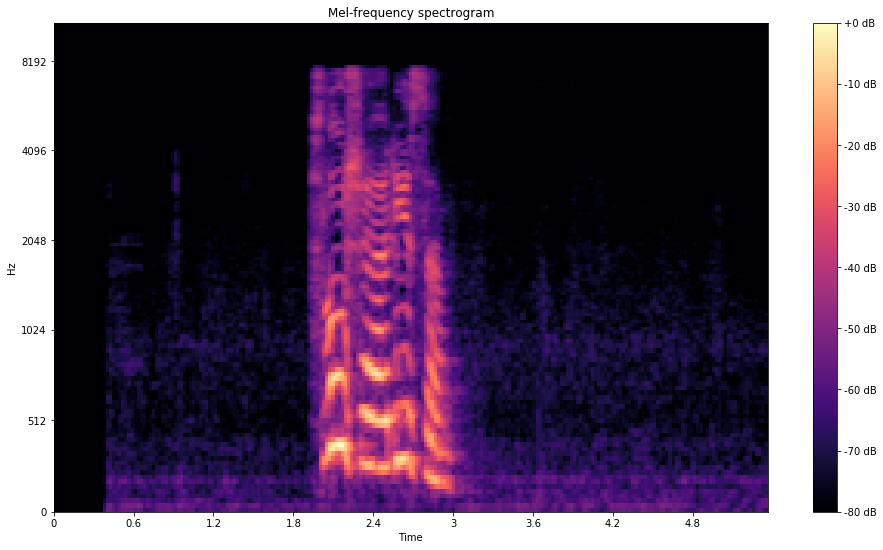

<Figure size 1152x648 with 0 Axes>

In [66]:
import librosa.display
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr, ax=ax)
plt.figure(figsize = (16,9)) 
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')

In [43]:
S.shape

(128, 272)

In [113]:
mel = np.mean(librosa.feature.melspectrogram(y, sr=sr).T,axis=0)

<ipython-input-113-00e025a55954>:1: FutureWarning: Pass y=[0.         0.         0.         ... 0.00072201 0.00082922 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(y, sr=sr).T,axis=0)


In [120]:
mel.shape

(128,)

In [54]:
from pydub import AudioSegment
# Load files
audio_segment = AudioSegment.from_file("train\\0a1f7e9733c1896cef712f25a3518bcf.wav")
# Print attributes
print(f"Channels: {audio_segment.channels}")
print(f"Sample width: {audio_segment.sample_width}")
print(f"Frame rate (sample rate): {audio_segment.frame_rate}")
print(f"Frame width: {audio_segment.frame_width}")
print(f"Length (ms): {len(audio_segment)}")
print(f"Frame count: {audio_segment.frame_count()}")
print(f"Intensity: {audio_segment.dBFS}")

c:\Users\Mikhail\Anaconda3\envs\scientificProject\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


Channels: 1
Sample width: 2
Frame rate (sample rate): 16000
Frame width: 2
Length (ms): 5376
Frame count: 86016.0
Intensity: -25.980402081669336


In [83]:
import IPython.display as ipd
ipd.Audio("train\\0a1f7e9733c1896cef712f25a3518bcf.wav")

In [81]:
ban = librosa.feature.spectral_bandwidth(y=y,sr=sr)[0]
frames = range(len(ban))
t = librosa.frames_to_time(frames, hop_length=512)

In [84]:
import os
files = os.listdir('train')

In [89]:
df = pd.read_table('targets.tsv',names=['file','gender'])

In [90]:
df

,file,gender
0,5d1f7e43366513a1d0a6ec5640c3dc24,1
1,9a701a4536a05b6610a590a9fe702ed8,1
2,cad0b8547008d1524c1a0e5fd51f9908,1
3,4bbe607e7dc95460e2cc1a6ee5f4dfa6,0
4,30fb32cba90b34af26f3f14f5d636805,0
...,...,...
13931,215443bcce2003d58d7dc6cd53af73ed,1
13932,d26e5ebee3589530a4ec735ba1baab83,0
13933,b9ae9428d4d7d279068aea06365d5736,1
13934,3da22010bcdd5b47d7f2d3ceea190195,0


In [91]:
files

['0006238dc99eaf68957dfc81826d1071.wav',
 '0007b9d41374f46f25cb35f13dc97e5e.wav',
 '000ad36ce0dcbc1032a606312d5e787d.wav',
 '0012112033f3f6c687c003cee20d0ba2.wav',
 '00122174f87c115e13f69cd685477387.wav',
 '00128d3dbe40482e69fa7115a108e122.wav',
 '0012de492fe2a5811bcc36371ad3a13f.wav',
 '001418d720f3f38e88a74dff39c46268.wav',
 '001468e989edc7827ffec11713645524.wav',
 '0017f6feabf9303491f4febb51584f26.wav',
 '001b54ffa084b57093556010a3305159.wav',
 '0028c04ae576ddc0dfe357da4da596fc.wav',
 '0029693e37fe5ca77db17e9dd1d96fb6.wav',
 '002dfb1fe7d4e0e6b5f28a319d70710f.wav',
 '0033060813158cb544cf316e90d548a9.wav',
 '003859f64e73128077757dce1ff4537e.wav',
 '003a9c4f16e460333d1cc88f7306ef9d.wav',
 '003e2ca98923056b62387176de55367d.wav',
 '0041770a63b3efdc216bcd1ebdd92978.wav',
 '004767ae215d953afd8f0cc8b5bbf3d6.wav',
 '004a909feabe027e273228436fb328ca.wav',
 '004b4cad0e5f2f8dda822a01a6d160ff.wav',
 '004c286a6ee77276e877d5fdf184fb0a.wav',
 '004ca8005f2e843a0e51eae7c4623021.wav',
 '0053e0e1b4fde6